In [1]:
import gym
import time
env = gym.make('CartPole-v0')
env.reset()
env.render()
time.sleep(2)

In [1]:
def reset(self):
    """ 重新初始化函数 """
    # 利用均匀随机分布初试化环境的状态 
    self.state = self.np_random.uniform(low=-0.05, high=0.05, size=(4,))
    
    # 设置当前步数为None
    self.steps_beyond_done = None
    
    # 返回环境的初始化状态
    return np.array(self.state)

In [2]:
def render(self, mode='human'):
    """ render()函数在这里扮演图像引擎的角色。一个仿真环境必不可少的两部分是物理引擎和图像引擎。物理引擎模拟环境中物体的运动规律；图像引擎用来显示环境中的物体图像 """
    screen_width = 600
    screen_height = 400
 
    world_width = self.x_threshold*2
    scale = screen_width/world_width
    carty = 100 # TOP OF CART
    polewidth = 10.0
    polelen = scale * 1.0
    cartwidth = 50.0
    cartheight = 30.0
 
    if self.viewer is None:
        # 导入rendering模块，利用rendering模块中的画图函数进行图形的绘制
        from gym.envs.classic_control import rendering
 
        # 绘制600*400的窗口函数为screen_width*screen_height
        self.viewer = rendering.Viewer(screen_width, screen_height)
        
        # 创建cart矩形,rendering.FilledPolygon为填充一个矩形
        l,r,t,b = -cartwidth/2, cartwidth/2, cartheight/2, -cartheight/2
        axleoffset =cartheight/4.0
        cart = rendering.FilledPolygon([(l,b), (l,t), (r,t), (r,b)])
        # Transform给cart添加平移属性和旋转属性
        self.carttrans = rendering.Transform()
        cart.add_attr(self.carttrans)
        # 在图上加入几何cart
        self.viewer.add_geom(cart)
 
        # 创建摆杆pole
        l,r,t,b = -polewidth/2,polewidth/2,polelen-polewidth/2,-polewidth/2
        pole = rendering.FilledPolygon([(l,b), (l,t), (r,t), (r,b)])        
        # 给pole设置颜色
        pole.set_color(.8,.6,.4)
        # 添加摆杆转换矩阵属性
        self.poletrans = rendering.Transform(translation=(0, axleoffset))
        pole.add_attr(self.poletrans)
        pole.add_attr(self.carttrans)
        # 加入几何体
        self.viewer.add_geom(pole)
        
        # 创建摆杆和台车之间的连接
        self.axle = rendering.make_circle(polewidth/2)
        self.axle.add_attr(self.poletrans)
        self.axle.add_attr(self.carttrans)
        self.axle.set_color(.5,.5,.8)
        self.viewer.add_geom(self.axle)
        
        #创建台车来回滑动的轨道，即一条直线
        self.track = rendering.Line((0,carty), (screen_width,carty))
        self.track.set_color(0,0,0)
        self.viewer.add_geom(self.track)
 
    if self.state is None: return None
 
    # 设置平移属性
    x = self.state
    cartx = x[0]*scale+screen_width/2.0 # MIDDLE OF CART
    self.carttrans.set_translation(cartx, carty)
    self.poletrans.set_rotation(-x[2])
 
    return self.viewer.render(return_rgb_array = mode=='rgb_array')

In [3]:
def step(self, action):
    """ 该函数在仿真器中扮演物理引擎的角色。其输入是动作a，输出是：下一步状态，立即回报，是否终止，调试项。该函数描述了智能体与环境交互的所有信息，是环境文件中最重要的函数。在该函数中，一般利用智能体的运动学模型和动力学模型计算下一步的状态和立即回报，并判断是否达到终止状态 """
    assert self.action_space.contains(action), "%r (%s) invalid"%(action, type(action))
    state = self.state
    # 系统的当前状态
    x, x_dot, theta, theta_dot = state
    # 输入动作，即作用到车上的力
    force = self.force_mag if action==1 else -self.force_mag
    # 余弦函数
    costheta = math.cos(theta)
    # 正弦函数
    sintheta = math.sin(theta)
    # 车摆的动力学方程式，即加速度与动作之间的关系
    temp = (force + self.polemass_length * theta_dot * theta_dot * sintheta) / self.total_mass
    # 摆的角加速度
    thetaacc = (self.gravity * sintheta - costheta* temp) / (self.length * (4.0/3.0 - self.masspole * costheta * costheta / self.total_mass))
    # 小车的平加速度
    xacc  = temp - self.polemass_length * thetaacc * costheta / self.total_mass
    # tau是更新步长0.02，下面是计算下一步的状态
    x  = x + self.tau * x_dot
    x_dot = x_dot + self.tau * xacc
    theta = theta + self.tau * theta_dot
    theta_dot = theta_dot + self.tau * thetaacc
    self.state = (x,x_dot,theta,theta_dot)
    # 设定小车和摆杆的阈值
    done =  x < -self.x_threshold \
            or x > self.x_threshold \
            or theta < -self.theta_threshold_radians \
            or theta > self.theta_threshold_radians
    done = bool(done)
 # 
    if not done:
        reward = 1.0
    elif self.steps_beyond_done is None:
        # Pole just fell!
        self.steps_beyond_done = 0
        reward = 1.0
    else:
        if self.steps_beyond_done == 0:
            logger.warn("You are calling 'step()' even though this environment has already returned done = True. You should always call 'reset()' once you receive 'done = True' -- any further steps are undefined behavior.")
        self.steps_beyond_done += 1
        reward = 0.0
 
    return np.array(self.state), reward, done, {}

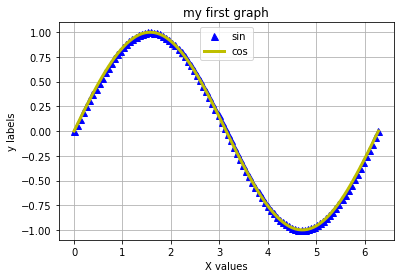

In [51]:
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline
x=np.linspace(0,2*np.pi,100)
y=np.sin(x)
y2 = np.cos(x-np.pi/2)
# y3 = np.c+
plt.grid(True)
plt.xlabel("X values")
plt.ylabel("y labels")
plt.title("my first graph")
# plt.axis([0,5,,11])
plt.plot(x,y,'b^',linewidth=3,markersize=7,label='sin')
plt.plot(x,y2,'y-',linewidth=3,markersize=7,label='cos')
# plt.plot(x,y3,'y:o',linewidth=3,markersize=7,label='yello')

plt.legend(loc='upper center')
plt.show()